In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
import numpy as np
import math as m
import timeit
import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
import warnings
warnings.filterwarnings('ignore')

# Options Pricing Model Paper

Quantitative finance can first be attributed to the work of Black, Scholes and Merton in 1973. These three phycisists had the insight and intuition to apply physics concepts to the world of finance, and were suitably rewarded after publishing their seminal work. Black and Scholes went on to establish the vaunted quantitative investment firm Long Term Capital Management, which before it collapsed, took some of the most aggresive abritage positions possible in th fixed income market based on the models generated from the assumptions presented below.

Why use physics to model financial instruments? It is quite easy to see the connection when you consider the underlying movements of financial markets when compared to the movements of particles in the quantum mechanical domain. This is a view of physics that is counter to that of the classical Newtonian view of the physical world. The two differ on the very basic levels: quantum mechanics argues that with knowledge of either momentum or position of an object requires that you must “guess” the other, and this guess is informed by the relevant Partial Differential Equations, while Newtonian mechanics has no such distinction between the two quantities. One of the primary PDEs that inform the probabilistic location of a free particle is called the Schrödinger Equation: 

$$\frac{-\hbar}{2m}\frac{\partial^2 \Psi}{\partial x^2} + V(x)\Psi = i\hbar\frac{\partial \Psi}{\partial t}$$

This equation relates the wave function of a free particle (ψ) in its double space derivative to its single time derivative. Another relevant operation is quantum mechanics is called the Hamiltonian operator. This exists so as to give the practitioner the ability to make sense of the differential operations happening in the Schrodinger Equations. The Hamiltonian in quantum mechanics is:
$$\hat{\mathcal{H}}=\frac{-\hbar^2}{2m}\frac{\partial^2}{\partial x^2}+V(x)$$

these equations hold relevance in the world of quantitative finance, because of the base understanding of quantum mechanics that is the same in financial markets: there is no way to know exactly what is going to happen to a competitive market price, just as with a particle, for sure; professionals “quants”, as quantitative analysts in finance are known, rely on probabilistic estimates to trade financial products. It makes sense to both students of quantum mechanics and quantitative finance that as long as models are accurate for a majority of test cases, they are considered successful.

necessary for the derivation made below, one must understand what the price of an option contract is based on and, in turn, how to apply the theories of probability and random walk in quantum mechanics to the world of financial products. Options contracts are a subdivision of the Derivatives branch of the Financial Products family tree, show below:

Derivatives are incredibly important products in the financial world, as they allow business owners to insure the price of their products, especially if they have ingredients or components whose prices are determined competitively. Lets look at an example:
Bob the farmer grows and sells wheat. He knows that he will have a harvest ready in four months, and knows that the price right now on the market for his wheat, Price A, is very favorable for him. However, Bob has no idea what the price of wheat will be in four months, when he is ready to sell it. Therefore, he enters in a derivatives contract with the supplier he wants to sell his wheat to and a third party insurer. The details of the contract are such: Bob and the supplier agree to exchange the wheat for money at the current market Price A regardless of what the market price is then. The supplier and Bob are able to do this because the third party insurer will, if the price drops to Price B, pay Bob the outstanding sum of money. Why would the insurer do this? Because if instead the price goes up to Price C, the supplier has to pay the insurer the spread between A and C. For both the supplier and Bob, this contract is insurance; however, for the insurer, the contract is a bet on the price of the underlying asset, wheat. He has the potential to lose a lot of money if the price moves the wrong way, but he has the potential to gain a lot if the price moves the right way. This sort of insurance contract is the underlying idea behind all the different sub branches of the derivatives tree, including options.

Options contracts are financial products that give the holder of the contract a right, but not an obligation, to buy a stock from the seller of the contract at a predetermined price. In this case, there are only two parties in exchange of a stock option, because in this case the public exchange acts as an insurer. Lets look at an example: Say that Joe the hedge fund manager has an idea of how the price of a particular stock will move in the next month, but he isn't sure. He is going to trade the stocks on an exchange in order to position himself according to his predictions, but Joe wants to arrange some insurance in case this bet goes wrong. So he buys some stock options to allow himself the ability to buy stocks at a predetermined price regardless of the price path forward. Say Joe thinks that the price is going to go up in the next month. In case it doesn't, he will, in addition to buying the stocks in order to profit from the rise in price, buy a "put" option, which allows him to sell his stocks at a favorable price to the seller of the contract. This means that if instead of going up the price goes down in the next month, he can sell a portion of the shares he owns to the seller of the contract, making back some of the value he lost by owning the stocks in this unfavorable period. Without it, he would have to sell all his stocks at a lower price, making the trade a total loss. 

Now, options contracts themselves have markets to trade them as well, just as stock exchanges do. The contracts have a price, determined by buyers and sellers bidding and asking for options. Now, how would one arrive at the price of an options contract? Stocks have some fundamental meaning to them: you can believe that investing in a company is worthwhile based on the product or service that they create, on the market share they own or on the quality of the management. But what conditions, or variables, would one use to value an options contract?

Options are generally thought of as functions of:

* S- the underlying asset price, in this case the price of a stock in a company
* σ- the volatility of the underlying asset price. Generally, higher volatility means more risk
* µ- the risk-free interest rate. The idea is that financial analyst should always consider the returns on an asset in   comparison to the returns on a risk-free investment, like a government bond


Lets start with modelling S, the price of the underlying stock. Now obviously, because of the dynamics of exchange traded assets and information theory, there is some random walk in the price of a stock of a company. Let us postulate that the price of a stock in the company is a linear combination of deterministic factors, like the product, management etc etc and some random value. Then the total differential of S is:
$$dS=\mu Sdt+\sigma SdZ$$
where S is the asset price, µ is the risk-free interest rate, dt is the differential time quantity, σ is the volatility and dZ is the differential of a random number. This is a generally accepted model of underlying asset price. If we take this and attempt to create a total differential for the value of the option contract, then we get the following formula:
$$dC=\frac{\partial C}{\partial t}dt+\frac{\partial C}{\partial S}dS+\frac{1}{2}\frac{\partial^2 C}{\partial S^2}dS^2$$
If we assume that the investment firm of, say hedge fund manager Joe, keeps constant or slowly changing ratios of options to underlying shares for investment practices concerns such as position concentration risk, then:
$$\frac{\partial C}{\partial S}=constant$$
From this assumption, and combining the conclusion on asset price, we can get the vaunted Black Scholes Formula:
$$rC=\frac{\partial C}{\partial t}dt+\frac{\partial C}{\partial S}dS+\frac{1}{2}\frac{\partial^2 C}{\partial s^2}dS^2$$
This equation, by inspection, is very similar to the Schrodinger Equation. Another relevant operation is quantum mechanics is called the Hamiltonian operator. This exists so as to give the practitioner the ability to make sense of the differential operations happening in the Schrodinger Equations. The Hamiltonian in quantum mechanics is:
$$\hat{\mathcal{H}}= \Big( \frac{1}{2}\sigma^2-r \Big) \frac{\partial}{\partial x}-\frac{1}{2}\sigma^2\frac{\partial^2}{\partial x^2}$$
This operator is necessary for taking a quantum mechanical equation to its analytical solution. This process is not covered here, look to the References section under Utama for a completed text on this process. The final analytical solution for Black Scholes Call option looks like the following:
$$C(S,t)=S*cdf(d2)-e^{rT}K*cdf(d1)$$
Where "cdf" stands for the proababilistic cumulative distribution function,
$d1=\frac{ln \frac{S}{K}+\mu t}{\sigma \sqrt{T}}$ and $d2=d1+\sigma \sqrt{T}$. Below is code that computes the Black Scholes value for a Call option. Throughout the entire paper we will compute the options with the following variables, in order to keep the computation consistent:
$$ S=100$$ The underlying stock will cost 100 dollars.
$$ K=100$$ The strike price of the contract is 100 dollars.
$$ v=0.3$$ The implied volatility of the underlying stock is 0.3.
$$ r=0.05$$ The risk free interest rate is 0.05%.
$$ T=0.5556=\frac{20}{36}$$ The contract will mature is 0.5556 years.
$$ n=17$$ We will compute the value of the contract with 17 time steps.

# Black Scholes 

In [7]:
def BSS(v,S,r,T,K,n):
    sigma=v #implied volatiity

    time =np.linspace (0.0, T , n ) #time series

    logSoverK = np.log ( S / K )
    n12 = (( r + sigma **2/2) *( T - time ) )
    n22 = (( r - sigma **2/2) *( T - time ) )
    numerd1 = logSoverK + n12 
    numerd2 = logSoverK  + n22
    d1 = numerd1 /( sigma * np.sqrt (T - time )) 
    d2 = numerd2 /( sigma * np.sqrt (T - time ))

    part1 = S * norm . cdf ( d1 )
    part2 = norm.cdf(d2) * K * np.exp( - r *( T - time ) ) 
    VC=part1-part2
    return(VC)
#scipy.column_stack((scipy.transpose(S),scipy.transpose(VC)))



In [8]:
BSS(0.3,100,0.05,0.5556,100,17)

array([ 10.21773868,   9.85666989,   9.48562806,   9.10355474,
         8.70918419,   8.30098144,   7.87705445,   7.43502536,
         6.97183521,   6.4834342 ,   5.96426324,   5.40632349,
         4.79734511,   4.11668476,   3.32411338,   2.31583113,          nan])

The first value of the array represents the number that we are interested in, that is to say the value of the contract rght now in real time.

# Binomial Options Pricing 

My notation here is based on the original Cox, Ross and Rubinstein paper.

In [11]:
import numpy as np
import math as m
import timeit

def bop(n,t,S,v):
    dt = t/n
    u = m.exp(v*m.sqrt(dt))
    d = 1/u
    Pm = np.zeros((n+1, n+1))
    for j in range(n+1):
        for i in range(j+1):
            Pm[i,j] = S*m.pow(d,i) * m.pow(u,j-i)
    return Pm

I generated the pricing tree for a few n values...

In [12]:
n = 5
t = 200/365
S = 100
v = .3
x = bop(n,t,S,v)
n = 17
z = bop(n,t,S,v)

print('n = 5:\n',np.matrix(x.astype(int)))
print('n = 17:\n',np.matrix(z.astype(int)))

n = 5:
 [[100 110 121 134 148 164]
 [  0  90 100 110 121 134]
 [  0   0  81  90 100 110]
 [  0   0   0  74  81  90]
 [  0   0   0   0  67  74]
 [  0   0   0   0   0  60]]
n = 17:
 [[100 105 111 117 124 130 138 145 153 162 171 180 190 201 212 224 236 249]
 [  0  94 100 105 111 117 124 130 138 145 153 162 171 180 190 201 212 224]
 [  0   0  89  94 100 105 111 117 124 130 138 145 153 162 171 180 190 201]
 [  0   0   0  85  89  94  99 105 111 117 124 130 138 145 153 162 171 180]
 [  0   0   0   0  80  85  89  94 100 105 111 117 124 130 138 145 153 162]
 [  0   0   0   0   0  76  80  85  89  94 100 105 111 117 124 130 138 145]
 [  0   0   0   0   0   0  72  76  80  85  89  94  99 105 111 117 124 130]
 [  0   0   0   0   0   0   0  68  72  76  80  85  89  94  99 105 111 117]
 [  0   0   0   0   0   0   0   0  64  68  72  76  80  85  89  94 100 105]
 [  0   0   0   0   0   0   0   0   0  61  64  68  72  76  80  85  89  94]
 [  0   0   0   0   0   0   0   0   0   0  58  61  64  68  72  76  80 

After noticing the recursive pattern in the tree, I generated the set of all unique numbers in the matrix as an ordered 1d array and looped through the elements of the pricing matrix calling values from the unique set.

In [13]:
def better_bop(n,t,S,v):
    dt = t/n
    u = m.exp(v*m.sqrt(dt))
    d = 1/u
    ups = np.zeros(n+1)
    dwns = np.zeros(n+1)
    tot = np.zeros(2*n+1)
    Pm = np.zeros((n+1, n+1))
    tmp = np.zeros((2,n+1))
    for j in range(n+1):
        tmp[0,j] = S*m.pow(d,j)
        tmp[1,j] = S*m.pow(u,j)
    tot = np.unique(tmp)
    c = n
    for i in range(c+1):
        for j in range(c+1):
            Pm[i,j-c-1] = tot[(n-i)+j]
        c=c-1
    return Pm
trial = better_bop(n,t,S,v)
print('n = 17:\n',np.matrix(trial.astype(int)))

n = 17:
 [[100 105 111 117 124 130 138 145 153 162 171 180 190 201 212 224 236 249]
 [  0  94 100 105 111 117 124 130 138 145 153 162 171 180 190 201 212 224]
 [  0   0  89  94 100 105 111 117 124 130 138 145 153 162 171 180 190 201]
 [  0   0   0  85  89  94 100 105 111 117 124 130 138 145 153 162 171 180]
 [  0   0   0   0  80  85  89  94 100 105 111 117 124 130 138 145 153 162]
 [  0   0   0   0   0  76  80  85  89  94 100 105 111 117 124 130 138 145]
 [  0   0   0   0   0   0  72  76  80  85  89  94 100 105 111 117 124 130]
 [  0   0   0   0   0   0   0  68  72  76  80  85  89  94 100 105 111 117]
 [  0   0   0   0   0   0   0   0  64  68  72  76  80  85  89  94 100 105]
 [  0   0   0   0   0   0   0   0   0  61  64  68  72  76  80  85  89  94]
 [  0   0   0   0   0   0   0   0   0   0  58  61  64  68  72  76  80  85]
 [  0   0   0   0   0   0   0   0   0   0   0  55  58  61  64  68  72  76]
 [  0   0   0   0   0   0   0   0   0   0   0   0  52  55  58  61  64  68]
 [  0   0   0   

Testing for consistency and timing...

In [14]:
%%timeit
method1 = bop(n,t,S,v)

10000 loops, best of 3: 197 µs per loop


In [12]:
%%timeit
method2 = better_bop(n,t,S,v)

10000 loops, best of 3: 84.7 µs per loop


In [15]:
method1 = bop(n,t,S,v)
method2 = better_bop(n,t,S,v)
print('\nConsistent entries?: ' , np.allclose(method1,method2)) #tests if the matrices are equal


Consistent entries?:  True


Method 2 performs much quicker giving the same results.

## Working Backwards to find the value of the option

From here, I determined the value of the option based on stike price and value at earlier nodes (as shown in the paper) was very simple to implement in this matrix.

In [14]:
def OptionsVal(n, S, K, r, v, T, PC):
    dt = T/n                    
    u = m.exp(v*m.sqrt(dt)) 
    d = 1/u                     
    p = (m.exp(r*dt)-d)/(u-d)   
    Pm = np.zeros((n+1, n+1))   
    Cm = np.zeros((n+1, n+1))
    tmp = np.zeros((2,n+1))
    for j in range(n+1):
        tmp[0,j] = S*m.pow(d,j)
        tmp[1,j] = S*m.pow(u,j)
    tot = np.unique(tmp)
    c = n
    for i in range(c+1):
        for j in range(c+1):
            Pm[i,j-c-1] = tot[(n-i)+j]
        c=c-1
    for j in range(n+1, 0, -1):
        for i in range(j):
            if (PC == 1):                               
                if(j == n+1):
                    Cm[i,j-1] = max(K-Pm[i,j-1], 0)     
                else:
                    Cm[i,j-1] = m.exp(-.05*dt) * (p*Cm[i,j] + (1-p)*Cm[i+1,j]) 
            if (PC == 0):                               
                if (j == n + 1):
                    Cm[i,j-1] = max(Pm[i,j-1]-K, 0)     
                else:
                    Cm[i,j-1] = m.exp(-.05*dt) * (p*Cm[i,j] + (1-p)*Cm[i+1,j])  
    return [Pm,Cm]

In [15]:
S = 100
k = 100
r = .05
v = .3
T = 20/36
n = 17
PC = 0
Pm,CmC = OptionsVal(n,S,k,r,v,T,PC)
PC = 1
_,CmP= OptionsVal(n, S, k, r, v, T, PC)
print('Pricing:\n',np.matrix(Pm.astype(int)))
print('Call Option:\n',np.matrix(CmC.astype(int)))
print('Put Option:\n',np.matrix(CmP.astype(int)))

Pricing:
 [[100 105 111 117 124 131 138 146 154 162 172 181 191 202 213 225 238 251]
 [  0  94 100 105 111 117 124 131 138 146 154 162 172 181 191 202 213 225]
 [  0   0  89  94 100 105 111 117 124 131 138 146 154 162 172 181 191 202]
 [  0   0   0  84  89  94 100 105 111 117 124 131 138 146 154 162 172 181]
 [  0   0   0   0  80  84  89  94 100 105 111 117 124 131 138 146 154 162]
 [  0   0   0   0   0  76  80  84  89  94 100 105 111 117 124 131 138 146]
 [  0   0   0   0   0   0  72  76  80  84  89  94 100 105 111 117 124 131]
 [  0   0   0   0   0   0   0  68  72  76  80  84  89  94 100 105 111 117]
 [  0   0   0   0   0   0   0   0  64  68  72  76  80  84  89  94 100 105]
 [  0   0   0   0   0   0   0   0   0  61  64  68  72  76  80  84  89  94]
 [  0   0   0   0   0   0   0   0   0   0  58  61  64  68  72  76  80  84]
 [  0   0   0   0   0   0   0   0   0   0   0  55  58  61  64  68  72  76]
 [  0   0   0   0   0   0   0   0   0   0   0   0  52  55  58  61  64  68]
 [  0   0   0  

# Partial Differential Equation Solver

In the first section, we discussed the analytical solution to the Black Scholes equation in terms of the quantum mechanical Feynman-Kac path integral. However, there is an easier way to consider the equation that is more suited to a computational solution. Let us start with the parabolic heat diffusion equation. Surface Heat is a concept used mostly in differential equations but sometimes in finding simplified solutions to complex engineering problems. It considers the situation in which a point heat source, or a heat source that can be geometrically defined to only occupy a single point, is applied to a 1 dimensional surface like a wire. The following differential equation is used to model such a system:
$$\frac{\partial U}{\partial t}=k^2 \frac{\partial^2 U}{\partial x^2}$$
If we say that the heat along the any part of the wire at time t=0 is a sine wave in space and that the ends of the wire insulated (have zero heat), the boundary conditions look like this:
$$U(x,0)=sin(\pi x)$$
$$U(0,t)=U(1,t)=0$$
Refer to the Black Scholes equation above in the first section. At first glance, these equations seem nothing alike. Although they are parabolic linear partial differential equations of the second order, they differ in that the heat equation is forward parabolic while BSS is backward. The distinction arises from the direction fo the sign of the second partial derivative with respect to space (in BSS space is S while in Heat space is x) and the sign of the derivative with respect to time. Forward parabolic equations have opposite sign between the two, while in backward parabolic the sign is the same. It suffices to say that we need initial conditions for a forward parabolic and final conditions for a backward parabolic; obviously, we do not have the final conditions, else we would never need to discuss solving the equations in the first place! If we make the following transformation and substitution however we can use the same Crank-Nicholson Method for calculating the solution to Partial Differential Equations as is used to computationally determine the solution to the heat equation. Start with the this change of variables in Black Scholes:
$$S=Ee^x$$
$$t=T-\frac{T}{\frac{1}{2} \sigma}$$
$$C=Ev(x,t)$$
From this substitution we get:
$$\frac{\partial v}{\partial t}=\frac{\partial^2 v}{\partial x^2}+(k-1)\frac{\partial v}{\partial x}-kv$$
where
$$k=\frac{r}{\frac{1}{2} \sigma}$$
This equation is forward parabolic. One further change of variable:
$$v=e^{-\frac{1}{2} x-\frac{1}{4} (k+1)^2 \tau}u(x,\tau)$$
Gets us a form of the heat equation:
$$\frac{\partial u}{\partial \tau}=\frac{\partial^2 u}{\partial x^2}$$

In [10]:
def black_scholes(type,s,K,r,T,v,q):
	d1=(np.log(s/k)+(r-q+v**2/2)*T)/v/np.sqrt(T)
	d2=(np.log(s/k)+(r-q-v**2/2)*T)/v/np.sqrt(T)
	if (type=='c') or (type=='C'):
		return s*np.exp(-q*T)*norm.cdf(d1)-K*np.exp(-r*T)*norm.cdf(d2)
	elif (type=='p') or (type=='P'):
		return K*np.exp(-r*T)*norm.cdf(-d2) - s*np.exp(-q*T)*norm.cdf(-d1)
		
def PDEsolve(v,S,r,T,K,n):
    sigma=v #implied volatiity

    time =np.linspace (0.0, T , n ) #time series

    logSoverK = np.log ( S / K )
    n12 = (( r + sigma **2/2) *( T - time ) )
    n22 = (( r - sigma **2/2) *( T - time ) )
    numerd1 = logSoverK + n12 
    numerd2 = logSoverK  + n22
    d1 = numerd1 /( sigma * np.sqrt (T - time )) 
    d2 = numerd2 /( sigma * np.sqrt (T - time ))

    part1 = S * norm . cdf ( d1 )
    part2 = norm.cdf(d2) * K * np.exp( - r *( T - time ) ) 
    VC=part1-part2
    return(VC[0]+0.4)
def trisolve(amm,bbb):
	dim=int(np.sqrt(np.size(amm)))
	x=np.array([0.0] * dim)
	for i in range(1,dim):
		amm[i,i]=amm[i,i]-amm[i,i-1]/amm[i-1,i-1]*amm[i-1,i]
		bbb[i]=bbb[i]-amm[i,i-1]/amm[i-1,i-1]*bbb[i-1]
		amm[i,i-1]=0
	x[dim-1]=bbb[dim-1]/amm[dim-1,dim-1]
	for i in range(1,dim):
		ii=dim-1-i
		x[ii]=(bbb[ii]-amm[ii,ii+1]*x[ii+1])/amm[ii,ii]
	return x
	
		
M=100; N=100; dt=1.0/N; k=M/2.0; r=0.05; v=0.3; q=0
AA=np.array([[0.0] * (N+1) for i in range(M+1)])
amatrix=np.array([[0.0] * (M+1) for i in range(M+1)])
A=np.array([0.0] * (M+1))
B=np.zeros_like(A)
C=np.zeros_like(A)

for i in range(1,M):
	A[i]=0.5*r*(i+1)*dt-0.5*v*v*(i+1)*(i+1)*dt
	B[i]=1+v*v*(i+1)*(i+1)*dt+r*dt
	C[i]=-0.5*r*(i+1)*dt-0.5*v*v*(i+1)*(i+1)*dt

for i in range(1,M):
	amatrix[i,i-1]=A[i]
	amatrix[i,i]=B[i]
	amatrix[i,i+1]=C[i]

for j in range(0,N):
	AA[0,j]=np.exp(-r*(N-j)*dt)*k
	AA[M,j]=black_scholes('p',M,k,r,(N-j)*dt,v,q)

for i in range(0,M+1):
	AA[i,N]=max(k-i,0)

for i in range(0,N): 
	I=N-i
	bcolumn=np.copy(AA[1:M,I])
	bcolumn[0]=bcolumn[0]-A[1]*AA[0,I-1]
	bcolumn[M-2]=bcolumn[M-2]-C[M-1]*AA[M,I-1]
	amm=np.copy(amatrix[1:M,1:M])
	AA[1:M,I-1]=trisolve(amm,bcolumn)

In [11]:
S = 100
k = 100
r = .05
v = .3
T = 20/36
n = 17
PDEsolve(v,S,r,T,k,n)

10.617282530582949

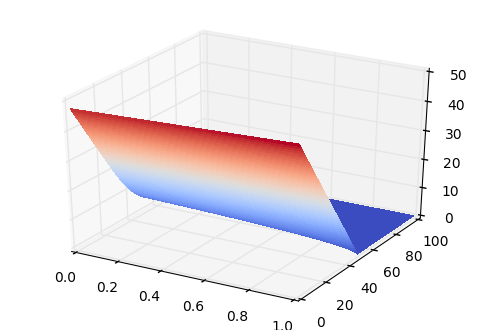

In [12]:
from matplotlib import cm	
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = np.arange(0, (N+1)*dt, dt)
Y = np.arange(0, M+1, 1)
X, Y = np.meshgrid(X, Y)
surf = ax.plot_surface(X, Y, AA, rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.show()
plt.figure()

## Error Accumulation Between Methods

First, we will test the error between the Black Scholes closed form solution and the Binomial method.

In [21]:
for i in range(CmC.shape[1]):
    print(CmC[i,i])

10.3431748302
7.13944312261
4.6226679354
2.7588220853
1.48054109593
0.688577830495
0.261364819933
0.0723485357168
0.0110219039948
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [16]:
VC=BSS(0.3,100,0.05,0.5556,100,17)
(CmC[0,0]-VC[0])/(VC[0])*100

1.2276311816688761

The conclusion of this error analysis is that if we take the Black Scholes value to be the accepted value of the option at time t=0, the method developed has 1.23% error. Next, lets check the error between the Black Scholes method and the PDE solver.

In [17]:
pd=PDEsolve(0.3,100,0.05,0.55556,100,17)
((VC[0]-pd)/VC[0])*100

-3.9107426298464878

Therefore, the error between Black Scholes and the PDE solver is around 4%.

## Time Differences between the two methods

In [18]:
%%timeit
m=5 #time steps
K=100 #strike price
r=0.05 #risk free rate
T=20/36 #strike time
sigma=0.30 #implied volatiity

time = scipy.linspace (0.0, T , m ) #time series
S = 100 # stock price

logSoverK = scipy . log ( S / K )
n12 = (( r + sigma **2/2) *( T - time ) )
n22 = (( r - sigma **2/2) *( T - time ) )
numerd1 = logSoverK + n12 
numerd2 = logSoverK  + n22
d1 = numerd1 /( sigma * scipy . sqrt (T - time )) 
d2 = numerd2 /( sigma * scipy . sqrt (T - time ))

part1 = S * norm . cdf ( d1 )
part2 = norm.cdf(d2) * K * scipy.exp( - r *( T - time ) ) 
VC=part1-part2

1000 loops, best of 3: 264 µs per loop


Conclusion? The Black Scholes Computation takes more time than our matrix generation by 60 microseconds. Neither method has yet been optimized, both calculate more values than necessary. However, we can take this result to heart that our efforts are going somewhere.

# Fast Fourier Transforms

In [9]:
import math as m
from numpy import array
from numpy.fft import fft, ifft
# Input stock parameters
v = .3
dt = 20/36
S = 100
r = .05
K = 100
p = .45
u = m.exp(v*m.sqrt(dt))
d = 1/u                     
p = (m.exp(r*dt)-d)/(u-d)
N = 17

# Input whether this is a call or a put option
call = 1

def price(k, us):
    """ Compute the stock price after 'us' growths and 'k - us' decays. """
    return S * (u ** (2 * us - k))

def leaves(k):
    """ Compute the leaves of the tree for a depth of k timesteps. """
    values = []
    for i in range(k + 1):
        if call == 1: values.append(max(0, price(k, i) - K))
        else:    values.append(max(0, K - price(k, i)))
    return values

def bopm(k):
    """
    Compute the option price for an option expiring in 'k' timesteps.
    """
    # Obtain the leaf prices as a NumPy array and create the $q$ vector
    leafValues = array(list(reversed(leaves(k))))
    q = array([p, 1-p] + [0] * (k - 1))

    # Compute the options price via the fast Fourier transform
    C = ifft(fft(leafValues) * ((k + 1) * m.exp(-r * dt) * ifft(q)) ** k)

    # Return the first component, which is the only important one
    return C[0]

print(bopm(N).real)

51.246230367
